In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
dataset=pd.read_csv(r'FuelConsumption.csv')
dataset

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1062,2014,VOLVO,XC60 AWD,SUV - SMALL,3.0,6,AS6,X,13.4,9.8,11.8,24,271
1063,2014,VOLVO,XC60 AWD,SUV - SMALL,3.2,6,AS6,X,13.2,9.5,11.5,25,264
1064,2014,VOLVO,XC70 AWD,SUV - SMALL,3.0,6,AS6,X,13.4,9.8,11.8,24,271
1065,2014,VOLVO,XC70 AWD,SUV - SMALL,3.2,6,AS6,X,12.9,9.3,11.3,25,260


In [3]:
type(dataset)

pandas.core.frame.DataFrame

In [4]:
dataset.drop(['MODELYEAR','MAKE','MODEL','VEHICLECLASS','TRANSMISSION','FUELCONSUMPTION_COMB_MPG'],axis=1,inplace=True)
dataset

,ENGINESIZE,CYLINDERS,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2.0,4,Z,9.9,6.7,8.5,196
1,2.4,4,Z,11.2,7.7,9.6,221
2,1.5,4,Z,6.0,5.8,5.9,136
3,3.5,6,Z,12.7,9.1,11.1,255
4,3.5,6,Z,12.1,8.7,10.6,244
...,...,...,...,...,...,...,...
1062,3.0,6,X,13.4,9.8,11.8,271
1063,3.2,6,X,13.2,9.5,11.5,264
1064,3.0,6,X,13.4,9.8,11.8,271
1065,3.2,6,X,12.9,9.3,11.3,260


In [5]:
dataset.isnull().any()

ENGINESIZE              False
CYLINDERS               False
FUELTYPE                False
FUELCONSUMPTION_CITY    False
FUELCONSUMPTION_HWY     False
FUELCONSUMPTION_COMB    False
CO2EMISSIONS            False
dtype: bool

In [6]:
dataset.isnull().sum()

ENGINESIZE              0
CYLINDERS               0
FUELTYPE                0
FUELCONSUMPTION_CITY    0
FUELCONSUMPTION_HWY     0
FUELCONSUMPTION_COMB    0
CO2EMISSIONS            0
dtype: int64

In [7]:
dataset.corr()

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,CO2EMISSIONS
ENGINESIZE,1.000000,0.934011,0.832225,0.778746,0.819482,0.874154
CYLINDERS,0.934011,1.000000,0.796473,0.724594,0.776788,0.849685
FUELCONSUMPTION_CITY,0.832225,0.796473,1.000000,0.965718,0.995542,0.898039
FUELCONSUMPTION_HWY,0.778746,0.724594,0.965718,1.000000,0.985804,0.861748
FUELCONSUMPTION_COMB,0.819482,0.776788,0.995542,0.985804,1.000000,0.892129
CO2EMISSIONS,0.874154,0.849685,0.898039,0.861748,0.892129,1.000000


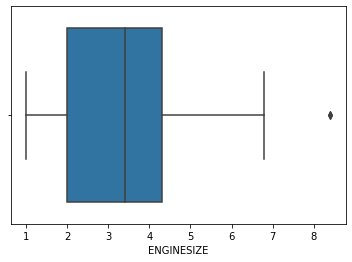

In [8]:
import seaborn as sns
sns.boxplot(dataset['ENGINESIZE'])

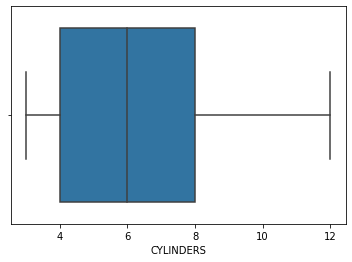

In [9]:
sns.boxplot(dataset['CYLINDERS'])

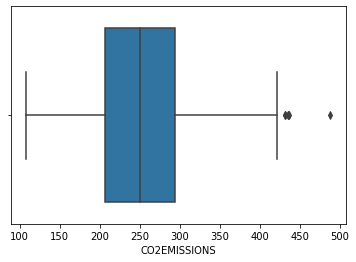

In [10]:
sns.boxplot(dataset['CO2EMISSIONS'])

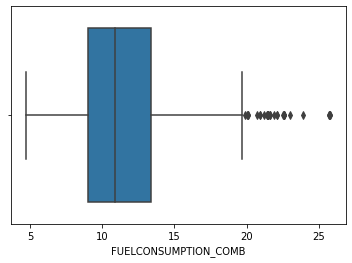

In [11]:
sns.boxplot(dataset['FUELCONSUMPTION_COMB'])

In [12]:
x=dataset.iloc[:,0:6].values
x

array([[2.0, 4, 'Z', 9.9, 6.7, 8.5],
       [2.4, 4, 'Z', 11.2, 7.7, 9.6],
       [1.5, 4, 'Z', 6.0, 5.8, 5.9],
       ...,
       [3.0, 6, 'X', 13.4, 9.8, 11.8],
       [3.2, 6, 'X', 12.9, 9.3, 11.3],
       [3.2, 6, 'X', 14.9, 10.2, 12.8]], dtype=object)

In [13]:
y = dataset.iloc[:,-1].values
y

array([196, 221, 136, ..., 271, 260, 294], dtype=int64)

In [14]:
dataset['FUELTYPE'].value_counts()

X    514
Z    434
E     92
D     27
Name: FUELTYPE, dtype: int64

In [15]:
import sklearn
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

In [16]:
ct=ColumnTransformer([("on",OneHotEncoder(),[2])],remainder='passthrough')
x=ct.fit_transform(x)
x

array([[0.0, 0.0, 0.0, ..., 9.9, 6.7, 8.5],
       [0.0, 0.0, 0.0, ..., 11.2, 7.7, 9.6],
       [0.0, 0.0, 0.0, ..., 6.0, 5.8, 5.9],
       ...,
       [0.0, 0.0, 1.0, ..., 13.4, 9.8, 11.8],
       [0.0, 0.0, 1.0, ..., 12.9, 9.3, 11.3],
       [0.0, 0.0, 1.0, ..., 14.9, 10.2, 12.8]], dtype=object)

In [17]:
x=x[:,1:]
x

array([[0.0, 0.0, 1.0, ..., 9.9, 6.7, 8.5],
       [0.0, 0.0, 1.0, ..., 11.2, 7.7, 9.6],
       [0.0, 0.0, 1.0, ..., 6.0, 5.8, 5.9],
       ...,
       [0.0, 1.0, 0.0, ..., 13.4, 9.8, 11.8],
       [0.0, 1.0, 0.0, ..., 12.9, 9.3, 11.3],
       [0.0, 1.0, 0.0, ..., 14.9, 10.2, 12.8]], dtype=object)

In [18]:
x.shape

(1067, 8)

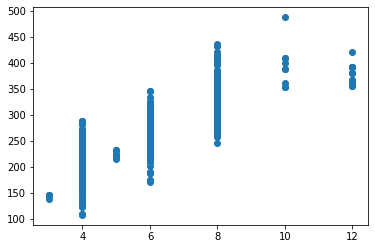

In [19]:
plt.scatter(x[:,4],y)

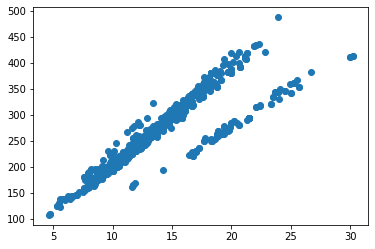

In [20]:
plt.scatter(x[:,5],y)

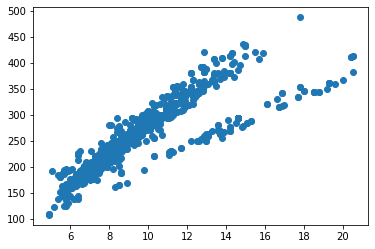

In [21]:
plt.scatter(x[:,6],y)

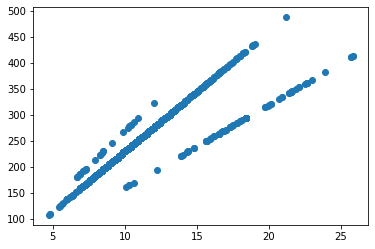

In [22]:
plt.scatter(x[:,7],y)

In [23]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [24]:
x_train

array([[0.0, 1.0, 0.0, ..., 14.6, 10.2, 12.6],
       [0.0, 1.0, 0.0, ..., 16.9, 12.8, 15.1],
       [0.0, 0.0, 1.0, ..., 12.1, 8.7, 10.6],
       ...,
       [0.0, 0.0, 1.0, ..., 13.5, 9.6, 11.7],
       [0.0, 0.0, 1.0, ..., 15.8, 10.2, 13.3],
       [0.0, 1.0, 0.0, ..., 13.1, 9.3, 11.4]], dtype=object)

In [25]:
y_train

array([290, 347, 244, 218, 170, 267, 389, 138, 218, 198, 280, 196, 237,
       255, 242, 168, 218, 246, 250, 186, 172, 315, 239, 413, 214, 260,
       246, 246, 264, 264, 163, 317, 254, 292, 380, 299, 230, 186, 216,
       232, 244, 202, 271, 170, 225, 162, 301, 225, 264, 214, 346, 212,
       191, 244, 242, 196, 207, 212, 288, 382, 294, 267, 235, 235, 322,
       196, 230, 259, 159, 224, 216, 235, 297, 181, 382, 239, 377, 294,
       223, 212, 435, 228, 230, 209, 294, 232, 294, 253, 239, 216, 168,
       222, 193, 283, 186, 340, 207, 193, 251, 209, 327, 271, 354, 258,
       267, 297, 271, 230, 251, 366, 200, 262, 168, 315, 212, 294, 207,
       207, 258, 196, 209, 221, 362, 389, 347, 308, 191, 198, 363, 260,
       235, 255, 294, 225, 232, 297, 232, 290, 251, 304, 182, 175, 277,
       294, 274, 260, 225, 163, 290, 230, 145, 205, 297, 196, 308, 168,
       380, 407, 338, 191, 264, 292, 225, 193, 336, 244, 317, 248, 359,
       196, 380, 179, 209, 237, 306, 235, 223, 338, 163, 317, 29

In [26]:
x_test

array([[0.0, 0.0, 1.0, ..., 17.2, 13.5, 15.5],
       [0.0, 1.0, 0.0, ..., 10.5, 7.3, 9.1],
       [0.0, 1.0, 0.0, ..., 11.4, 8.3, 10.0],
       ...,
       [0.0, 0.0, 1.0, ..., 9.3, 7.0, 8.3],
       [0.0, 0.0, 1.0, ..., 9.1, 6.7, 8.0],
       [0.0, 1.0, 0.0, ..., 9.1, 6.7, 8.0]], dtype=object)

In [27]:
y_test

array([356, 209, 230, 212, 168, 292, 212, 276, 202, 334, 313, 437, 224,
       281, 177, 260, 414, 223, 251, 359, 191, 189, 244, 242, 131, 283,
       274, 294, 246, 110, 359, 239, 229, 237, 191, 196, 294, 221, 237,
       237, 184, 184, 202, 194, 297, 198, 260, 179, 344, 359, 338, 288,
       290, 129, 230, 179, 283, 159, 258, 209, 207, 205, 225, 294, 262,
       299, 354, 230, 207, 124, 304, 189, 354, 270, 338, 216, 283, 179,
       235, 166, 186, 253, 161, 334, 407, 246, 191, 172, 290, 258, 262,
       209, 283, 342, 356, 368, 168, 221, 368, 262, 182, 320, 126, 166,
       202, 196, 200, 288, 191, 259, 214, 228, 269, 317, 327, 294, 292,
       244, 361, 200, 258, 191, 382, 147, 179, 310, 229, 237, 292, 264,
       230, 294, 184, 136, 344, 373, 283, 110, 198, 232, 262, 191, 342,
       368, 189, 175, 285, 345, 301, 138, 179, 251, 161, 235, 310, 242,
       292, 221, 324, 235, 177, 209, 177, 202, 242, 205, 264, 184, 400,
       334, 260, 285, 235, 301, 281, 276, 265, 242, 184, 345, 29

In [28]:
from sklearn.preprocessing import StandardScaler
sc1=StandardScaler()
x_train=sc1.fit_transform(x_train)
x_test=sc1.transform(x_test)

In [29]:
from sklearn.ensemble import RandomForestRegressor

In [30]:
rf=RandomForestRegressor(n_estimators=10,criterion="mse",random_state=0,max_depth=5)

In [31]:
rf.fit(x_train,y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=5, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=10, n_jobs=None, oob_score=False,
                      random_state=0, verbose=0, warm_start=False)

In [32]:
from joblib import dump
dump(rf,'RFR.save')

['RFR.save']

In [33]:
y_pred=rf.predict(x_test)
y_pred

array([354.41811702, 211.96427987, 234.63331749, 216.10662307,
       172.98801208, 292.94190629, 213.45233014, 281.39590092,
       199.02261235, 351.74868073, 312.94747388, 405.38876607,
       209.23012886, 279.37005348, 178.19672371, 260.15349384,
       399.76558633, 219.52565365, 264.95613472, 354.41811702,
       194.36111718, 193.76274356, 246.05032187, 245.7455449 ,
       128.31666667, 284.31421324, 271.51436073, 296.45119406,
       246.05032187, 123.14      , 354.41811702, 242.40393986,
       231.7239881 , 235.54893173, 194.36111718, 198.15792232,
       294.33919184, 219.52565365, 236.66498524, 238.17367488,
       187.01783499, 182.3309241 , 199.02261235, 175.72804979,
       294.33919184, 199.02261235, 260.64901853, 180.06698583,
       348.85689988, 354.41811702, 351.74868073, 280.59223893,
       288.70266239, 128.31666667, 234.63331749, 180.06698583,
       282.79280745, 170.43183976, 258.87180669, 211.96427987,
       206.2959088 , 206.2959088 , 222.36729626, 296.45

In [34]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.9913047727968988